# COVID-19 Genome Analysis using Biopython

## Context
- Fetching COVID-19 genome from NCBI
- COVID-19 genome (MN908947) used here was sequenced from bronchiolar lavage fluid of a patient in Wuhan, China on 26 December 2019

### Fetching the genome 

In [1]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [3]:
covid_dna = recs[0].seq
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [4]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [5]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [6]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

### Distribution of nucleotides in COVID-19 genome

In [7]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [8]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

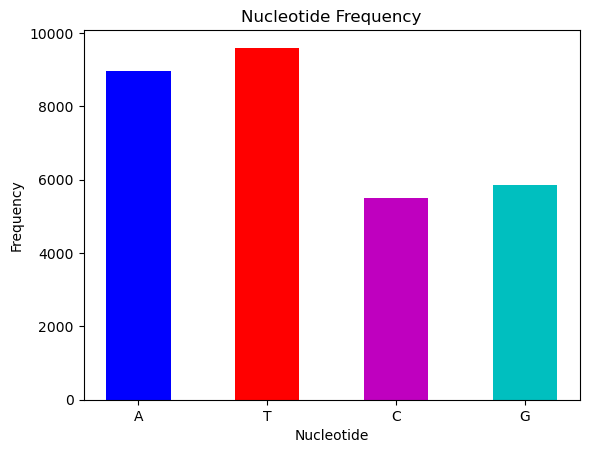

In [9]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

Interpretation: The A, T content is comparatively higher than the G, C content, which ultimately affects the stability of the genome.

The next steps would be to perform transcription, followed by translation of the genome to extract the sequence information of the proteins with highest number of amino acids within them, as these proteins may play crucial roles in COVID-19 occurence and survival.

### Transcription

In [10]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

### Translation

In [12]:
len(covid_mrna)

29903

As the length of the mRNA sequence is not a multiple of 3, we will add trailing 'N' to the end of the sequence

In [13]:
modified_covid_mrna = covid_mrna + "N"

In [14]:
covid_aa = modified_covid_mrna.translate()
covid_aa

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKX')

In [15]:
# most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

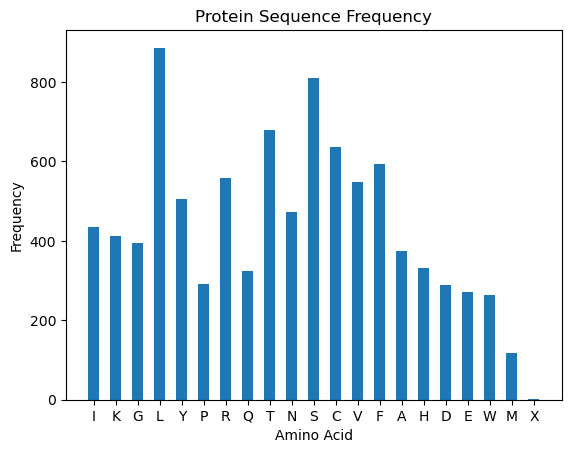

In [17]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [19]:
print(f"Covid-19's genome has total {sum(common_amino.values())} functional amino acids")

Covid-19's genome has total 9194 functional amino acids


In [20]:
proteins = covid_aa.split('*')

The split() function splits the sequence at stop codons

In [21]:
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [24]:
print(f'We have {len(proteins)} polypeptide chains in the covid-19 genome')

We have 775 polypeptide chains in the covid-19 genome


Note: only the polypeptide chains of length >20 amino acids are considered to be proteins. Thus, we will keep only those chains and discard the rest.

In [25]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [26]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [29]:
# selecting the top 5 proetins based upon sequence length
top_5_proteins = sorted(proteins, key = len)
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [ ]:
# saving the protein file for further analysis
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

## Summary:

# Finish!